In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
from collections import defaultdict
import re

In [ ]:
#17 pulse numbers in the data set -> they are imaginary so each number is represented by two attributes
#So we have 34 continuous predictor columns and a final column classifying if the data is 'good' or 'bad'

#here we build the headers
headers = []
for x in range(1,18):

  headers.append('real_val' +str(x))
  headers.append('complex_val' + str(x))

headers.append('classification')

#df is dataframe
df_ion = pd.read_csv('./IonosphereDataSet/ionosphere.data',header=None, names = headers)

# since there is no missing we can start looking at the data 

df_ion.head(10)

In [ ]:
#Analyze the data
df_ion.describe()

In [ ]:
#plotting values of complex numbers on a couple 'good' sets
plt.scatter(df_ion.iloc[0][:34:2], df_ion.iloc[0][1:34:2], color="green")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers for good output 1')
plt.show()


plt.scatter(df_ion.iloc[2][:34:2], df_ion.iloc[2][1:34:2], color="green")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers for good output 2')
plt.show()

plt.scatter(df_ion.iloc[4][:34:2], df_ion.iloc[4][1:34:2], color="green")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers for good output 3')
plt.show()


In [ ]:
#plotting the values of some of the bad sets 

plt.scatter(df_ion.iloc[1][:34:2], df_ion.iloc[0][1:34:2], color="red")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers for bad output 1')
plt.show()


plt.scatter(df_ion.iloc[3][:34:2], df_ion.iloc[2][1:34:2], color="red")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers for bad output 2')
plt.show()

plt.scatter(df_ion.iloc[5][:34:2], df_ion.iloc[4][1:34:2], color="red")
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers for bad output 3')
plt.show()

In [ ]:
#Checking if features are correlated
corr = df_ion.corr()
sns.heatmap(corr)

#No group of inputs are very correlated 


<h2> BCW Dataset </h2>

In [37]:
# Reading dataset into a dataframe
df_bcw = pd.read_csv('./BCW Data Set/breast-cancer-wisconsin.data', index_col = False, header=None, names=['id Number', 'Clump Thincknes', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses', 'Class'])

# Replacing the missing values with NaNs and finding missing values
df_bcw.replace(' ?', np.nan, inplace=True)

#dropping rows with missing values
df_bcw.dropna()

# no missing data now



,id Number,Clump Thincknes,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [38]:
#Id number is not clearly not relavant so it is dropped
df_bcw.drop(['id Number'] , inplace=True, axis = 1)


In [39]:
df_bcw.describe()
#makes sense

,Clump Thincknes,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


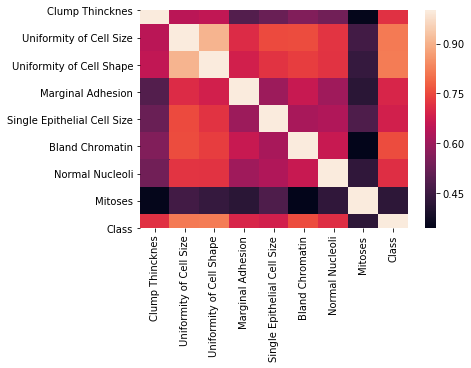

In [41]:
#check for correlations
bcw_corr = df_bcw.corr()
sns.heatmap(bcw_corr)

In [44]:
#Uniformity in cell size and uniformity in cell shape are clearly correlated 
#so one should be dropped 
df_bcw.drop(['Uniformity of Cell Size'] , inplace=True, axis = 1)